In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import math

%matplotlib inline

In [2]:
fig4b1 = pd.read_excel('Fig.4b-1.xlsx', engine='openpyxl', index_col=0)
fig4b2 = pd.read_excel('Fig.4b-2.xlsx', engine='openpyxl')

In [3]:
fig4b1.columns = ['aligner', 'caller', 'total_count', 'f_score', 'recall', 'precision']

In [4]:
bowtie2_recall = fig4b1[ (fig4b1.aligner=='bowtie') & (fig4b1.caller=='strelka')]['recall']
bwa_recall     = fig4b1[ (fig4b1.aligner=='bwa') & (fig4b1.caller=='strelka') ]['recall']
novo_recall    = fig4b1[ (fig4b1.aligner=='novo') & (fig4b1.caller=='strelka') ]['recall']

bowtie2_precision = fig4b1[ (fig4b1.aligner=='bowtie') & (fig4b1.caller=='strelka') ]['precision']
bwa_precision     = fig4b1[ (fig4b1.aligner=='bwa') & (fig4b1.caller=='strelka') ]['precision']
novo_precision    = fig4b1[ (fig4b1.aligner=='novo') & (fig4b1.caller=='strelka') ]['precision']

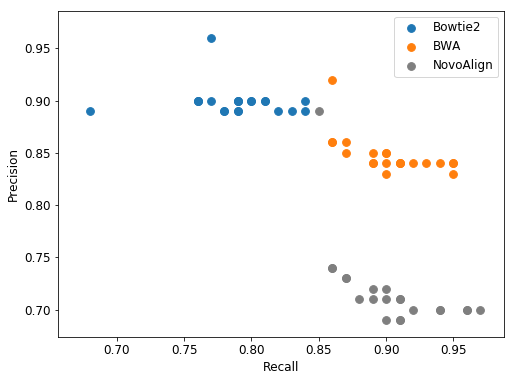

In [5]:
fig = plt.figure(figsize=(8, 6))
msize = 60

ax = fig.add_subplot(111)
ax.scatter(bowtie2_recall, bowtie2_precision, color='tab:blue', s=msize)
ax.scatter(bwa_recall,     bwa_precision, color='tab:orange', s=msize)
ax.scatter(novo_recall,    novo_precision, color='tab:gray', s=msize)

ax.set_xlabel('Recall', size=12)
ax.set_ylabel('Precision', size=12)
ax.legend(('Bowtie2', 'BWA', 'NovoAlign'), fontsize=12)
_ = plt.yticks( size=12 )
_ = plt.xticks( size=12 )

_ = plt.savefig('../Main_Figs/Fig_4b_noPiP.pdf')

In [6]:
max_bowtie_freq = fig4b2[fig4b2.Software=='Bowtie2']['Frequency'].max()
bowtie2_mq_relative_freqs = fig4b2[(~fig4b2.Frequency.isna()) & (fig4b2.Software=='Bowtie2')]['Frequency']/max_bowtie_freq

In [7]:
# msize=10
# fig = plt.figure(figsize=(3, 2))
# ax = fig.add_subplot(111)
# ax.plot(bowtie2_mq_relative_freqs, color='tab:blue')

# _ = plt.xticks( () )
# _ = plt.yticks( () )

In [8]:
# color_pattern = {'Bowtie2': 'tab:blue', 'BWA': 'tab:orange', 'NovoAlign': 'tab:gray'}
# _ = sns.violinplot( x=fig4b2.Software, y=fig4b2['Frequency'], palette=color_pattern )

In [9]:
bowtie2_sim = []
bwa_sim = []
novo_sim = []
for i, row_i in fig4b2.iterrows():
    if row_i.Software == 'Bowtie2' and row_i.Frequency >= 0:
        bowtie2_sim += [row_i.mapq] * math.ceil(row_i.Frequency / 1e7)
    elif row_i.Software == 'BWA' and row_i.Frequency >= 0:
        bwa_sim += [row_i.mapq] * math.ceil(row_i.Frequency / 1e7)
    elif row_i.Software == 'NovoAlign' and row_i.Frequency >= 0:
        novo_sim += [row_i.mapq] * math.ceil(row_i.Frequency / 1e7)

In [10]:
max_i = max(len(novo_sim), len(bowtie2_sim), len(bwa_sim))

novo_sim += [np.nan] * int(max_i - len(novo_sim))
bwa_sim += [np.nan] * int(max_i - len(bwa_sim))
bowtie2_sim += [np.nan] * int(max_i - len(bowtie2_sim))

In [11]:
sim_df = pd.DataFrame({'MAPQ': bowtie2_sim + bwa_sim + novo_sim,
                      'Aligner': ['Bowtie2',] * len(bowtie2_sim) + ['BWA',] * len(bwa_sim) + ['NovoAlign',] * len(novo_sim)})

In [12]:
# color_pattern = {'Bowtie2': 'tab:blue', 'BWA': 'tab:orange', 'NovoAlign': 'tab:gray'}
# _ = sns.violinplot( x=sim_df.Aligner, y=sim_df['MAPQ'], scale='count', inner=None, palette=color_pattern )
c = np.random.randint(2, size=200)


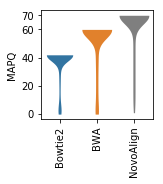

In [13]:
color_pattern = {'Bowtie2': 'tab:blue', 'BWA': 'tab:orange', 'NovoAlign': 'tab:gray'}
_ = plt.figure(figsize=(2, 2))
_ = sns.violinplot( x=sim_df.Aligner, y=sim_df['MAPQ'], linewidth=0, scale='count', cut=0, inner=None, palette=color_pattern )
_ = plt.xlabel('')
_ = plt.yticks((0, 20, 40, 60, 70), (0, 20, 40, 60, 70))
_ = plt.xticks( (0,1,2), ('Bowtie2', 'BWA', 'NovoAlign'), rotation=90 )


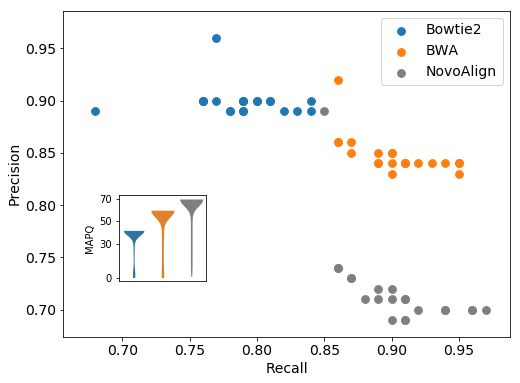

In [14]:
fig = plt.figure(figsize=(8, 6))
msize = 60

ax = fig.add_subplot(111)
ax.scatter(bowtie2_recall, bowtie2_precision, color='tab:blue', s=msize)
ax.scatter(bwa_recall,     bwa_precision, color='tab:orange', s=msize)
ax.scatter(novo_recall,    novo_precision, color='tab:gray', s=msize)
ax.legend(('Bowtie2', 'BWA', 'NovoAlign'), fontsize=14)
_ = plt.yticks( size=14 )
_ = plt.xticks( size=14 )


inset_stuff = inset_axes(ax, 
                    width=1.2, # width = 30% of parent_bbox
                    height=1.2, # height : 1 inch
                    loc='upper right', bbox_to_anchor=(0.03, 0.15, .3, .3), bbox_transform=ax.transAxes
                        )
_ = sns.violinplot( x=sim_df.Aligner, y=sim_df['MAPQ'], linewidth=0, scale='count', cut=0, inner=None, palette=color_pattern )
_ = plt.xlabel('')
_ = plt.yticks((0, 30, 50, 70), (0, 30, 50, 70))
_ = plt.xticks( [] )

ax.set_xlabel('Recall', size=14)
ax.set_ylabel('Precision', size=14)

_ = plt.savefig('../Main_Figs/Fig_4b.pdf')

In [15]:
fig4c = pd.read_excel('Fig.4c.xlsx', engine='openpyxl', skiprows=[0], index_col=0)

In [16]:
fig4c = fig4c[~fig4c.index.isna()]

In [17]:
mutect_overlap = fig4c[fig4c.Caller=='muTect2']['Overlap']
mutect_loss    = fig4c[fig4c.Caller=='muTect2']['Loss']
mutect_gain    = fig4c[fig4c.Caller=='muTect2']['Gain']

strelka_overlap = fig4c[fig4c.Caller=='strelka']['Overlap']
strelka_loss    = fig4c[fig4c.Caller=='strelka']['Loss']
strelka_gain    = fig4c[fig4c.Caller=='strelka']['Gain']

sniper_overlap = fig4c[fig4c.Caller=='somaticSniper']['Overlap']
sniper_loss    = fig4c[fig4c.Caller=='somaticSniper']['Loss']
sniper_gain    = fig4c[fig4c.Caller=='somaticSniper']['Gain']

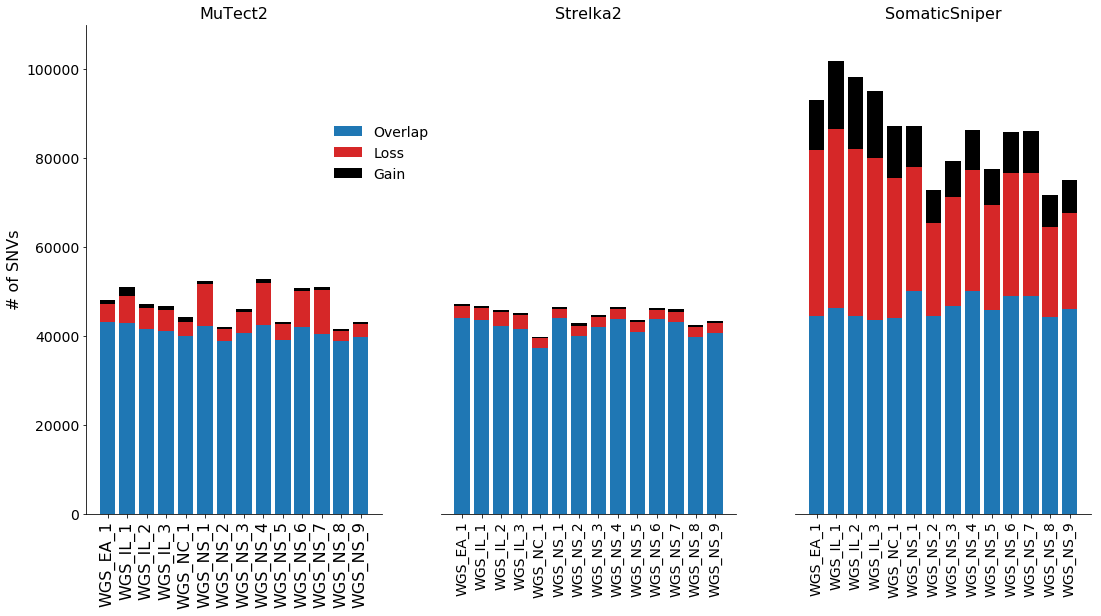

In [18]:
fig = plt.figure(figsize=(18, 9))

X = np.arange(len(mutect_overlap))

ax = fig.add_subplot(1, 3, 1)

ax.bar(X, mutect_overlap, color = 'tab:blue')
ax.bar(X, mutect_loss,    color = 'tab:red', bottom=mutect_overlap)
ax.bar(X, mutect_gain,    color = 'black', bottom=mutect_overlap+mutect_loss)

_ = plt.xticks( X, mutect_overlap.index, rotation=90, size=16 )
_ = plt.yticks(size=14)
ax.set_ylabel('# of SNVs', size=16)

ax.set_ylim((0, 110000))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('MuTect2', size=16)

ax.legend(('Overlap', 'Loss', 'Gain'), fontsize=14, bbox_to_anchor=(1.2, 0.82),  frameon=False)



ax = fig.add_subplot(1, 3, 2)

ax.bar(X, strelka_overlap, color = 'tab:blue')
ax.bar(X, strelka_loss,    color = 'tab:red', bottom=strelka_overlap)
ax.bar(X, strelka_gain,    color = 'black', bottom=strelka_overlap+strelka_loss)

_ = plt.xticks( X, strelka_overlap.index, rotation=90, size=14 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_ylim((0, 110000))
ax.set_title('Strelka2', size=16)




ax = fig.add_subplot(1, 3, 3)

ax.bar(X, sniper_overlap, color = 'tab:blue')
ax.bar(X, sniper_loss,    color = 'tab:red', bottom=sniper_overlap)
ax.bar(X, sniper_gain,    color = 'black', bottom=sniper_overlap+sniper_loss)

_ = plt.xticks( X, sniper_overlap.index, rotation=90, size=14 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_ylim((0, 110000))
ax.set_title('SomaticSniper', size=16)

_ = plt.savefig('../Main_Figs/Fig_4c.pdf', bbox_inches='tight')

In [19]:
fig4d = pd.read_excel('Fig.4d.xlsx', engine='openpyxl', skiprows=[0])

In [20]:
fig4d.columns = ['coverage', 'pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper', 'None', 
                             'pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']

In [21]:
fig4d = fig4d.drop('None', axis=1)

In [22]:
pure20_10x  = fig4d[fig4d['coverage']==10][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_30x  = fig4d[fig4d['coverage']==30][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_50x  = fig4d[fig4d['coverage']==50][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_80x  = fig4d[fig4d['coverage']==80][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_100x = fig4d[fig4d['coverage']==100][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_200x = fig4d[fig4d['coverage']==200][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]
pure20_300x = fig4d[fig4d['coverage']==300][['pure20_Lancet', 'pure20_MuTect2', 'pure20_Strelka2', 'pure20_TNscope', 'pure20_SomaticSniper']]

pure50_10x  = fig4d[fig4d['coverage']==10][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_30x  = fig4d[fig4d['coverage']==30][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_50x  = fig4d[fig4d['coverage']==50][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_80x  = fig4d[fig4d['coverage']==80][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_100x = fig4d[fig4d['coverage']==100][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_200x = fig4d[fig4d['coverage']==200][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]
pure50_300x = fig4d[fig4d['coverage']==300][['pure50_Lancet', 'pure50_MuTect2', 'pure50_Strelka2', 'pure50_TNscope', 'pure50_SomaticSniper']]

In [23]:
pure20_10x.to_numpy()[0]

array([0.04, 0.22, 0.07, 0.05, 0.07])

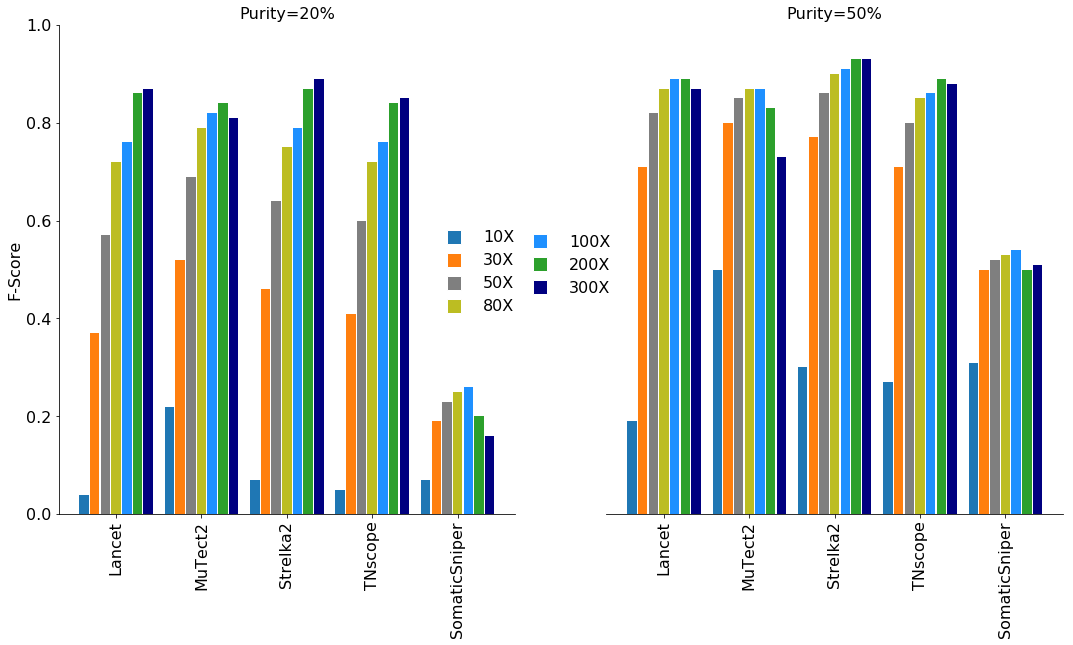

In [24]:
fig = plt.figure(figsize=(18, 9))

X = np.arange(pure20_10x.shape[1])

ax = fig.add_subplot(1, 2, 1)

ax.bar(X - 3/8, pure20_10x.to_numpy()[0],  color = 'tab:blue',   width = 1/9)
ax.bar(X - 2/8, pure20_30x.to_numpy()[0],  color = 'tab:orange', width = 1/9)
ax.bar(X - 1/8, pure20_50x.to_numpy()[0],  color = 'tab:gray',   width = 1/9)
ax.bar(X ,      pure20_80x.to_numpy()[0],  color = 'tab:olive',  width = 1/9)
ax.bar(X + 1/8, pure20_100x.to_numpy()[0], color = 'dodgerblue', width = 1/9)
ax.bar(X + 2/8, pure20_200x.to_numpy()[0], color = 'tab:green',  width = 1/9)
ax.bar(X + 3/8, pure20_300x.to_numpy()[0], color = 'navy',       width = 1/9)

_ = plt.xticks( X, ('Lancet', 'MuTect2', 'Strelka2', 'TNscope', 'SomaticSniper'), rotation=90, size=16 )
_ = plt.yticks(size=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim((0, 1))
ax.set_title('Purity=20%', size=16)
ax.set_ylabel('F-Score', size=16)


legend_elements = [Line2D([0], [0], marker='s', color='w', label='10X',       markerfacecolor='tab:blue', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='30X', markerfacecolor='tab:orange', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='50X',      markerfacecolor='tab:gray', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='80X',          markerfacecolor='tab:olive', markersize=14),
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.03 ,0.61), frameon=False, fontsize=16)



ax = fig.add_subplot(1, 2, 2)

ax.bar(X - 3/8, pure50_10x.to_numpy()[0],  color = 'tab:blue',   width = 1/9)
ax.bar(X - 2/8, pure50_30x.to_numpy()[0],  color = 'tab:orange', width = 1/9)
ax.bar(X - 1/8, pure50_50x.to_numpy()[0],  color = 'tab:gray',   width = 1/9)
ax.bar(X ,      pure50_80x.to_numpy()[0],  color = 'tab:olive',  width = 1/9)
ax.bar(X + 1/8, pure50_100x.to_numpy()[0], color = 'dodgerblue', width = 1/9)
ax.bar(X + 2/8, pure50_200x.to_numpy()[0], color = 'tab:green',  width = 1/9)
ax.bar(X + 3/8, pure50_300x.to_numpy()[0], color = 'navy',       width = 1/9)

_ = plt.xticks( X, ('Lancet', 'MuTect2', 'Strelka2', 'TNscope', 'SomaticSniper'), rotation=90, size=16 )
_ = plt.yticks(size=14)


legend_elements = [Line2D([0], [0], marker='s', color='w', label='100X', markerfacecolor='dodgerblue', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='200X', markerfacecolor='tab:green', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='300X', markerfacecolor='navy', markersize=14),
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.04 ,0.6), frameon=False, fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim((0, 1))
ax.set_title('Purity=50%', size=16)

_ = plt.savefig('../Main_Figs/Fig_4d.pdf', bbox_inches='tight')

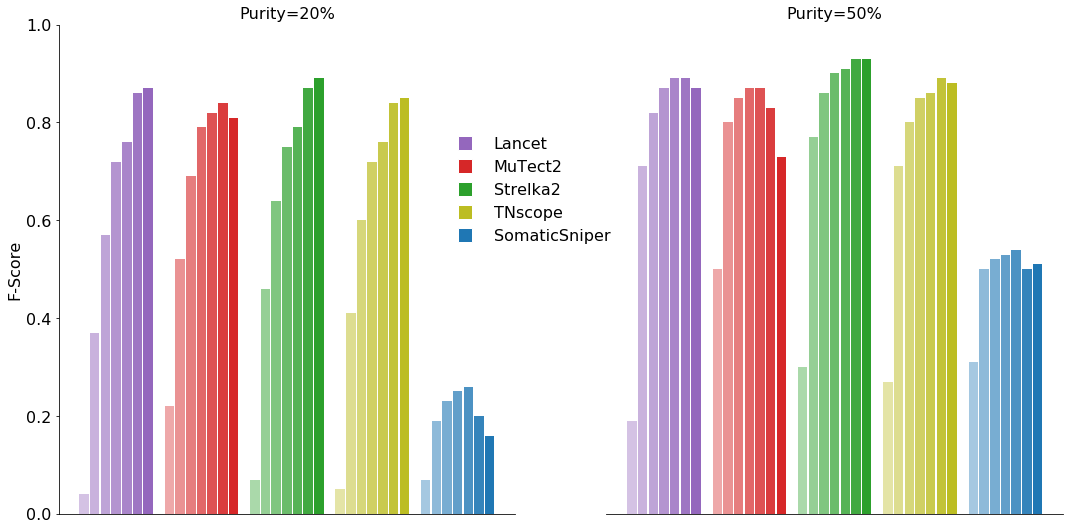

In [25]:
fig = plt.figure(figsize=(18, 9))

X = np.arange(pure20_10x.shape[1])

ax = fig.add_subplot(1, 2, 1)

ax.bar(X - 3/8, pure20_10x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.4, width = 1/9)
ax.bar(X - 2/8, pure20_30x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.5, width = 1/9)
ax.bar(X - 1/8, pure20_50x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.6, width = 1/9)
ax.bar(X      , pure20_80x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.7, width = 1/9)
ax.bar(X + 1/8, pure20_100x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.8, width = 1/9)
ax.bar(X + 2/8, pure20_200x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.9, width = 1/9)
ax.bar(X + 3/8, pure20_300x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=1.0, width = 1/9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = plt.xticks(())

ax.set_ylim((0, 1))
ax.set_ylabel('F-Score', size=16)
_ = plt.yticks(size=16)

ax.set_title('Purity=20%', size=16)



ax = fig.add_subplot(1, 2, 2)

ax.bar(X - 3/8, pure50_10x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.4, width = 1/9)
ax.bar(X - 2/8, pure50_30x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.5, width = 1/9)
ax.bar(X - 1/8, pure50_50x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.6, width = 1/9)
ax.bar(X      , pure50_80x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.7, width = 1/9)
ax.bar(X + 1/8, pure50_100x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.8, width = 1/9)
ax.bar(X + 2/8, pure50_200x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.9, width = 1/9)
ax.bar(X + 3/8, pure50_300x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=1.0, width = 1/9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim((0, 1))
ax.set_title('Purity=50%', size=16)

legend_elements = [Line2D([0], [0], marker='s', color='w', label='Lancet', markerfacecolor='tab:purple', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='MuTect2', markerfacecolor='tab:red', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='Strelka2', markerfacecolor='tab:green', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='TNscope', markerfacecolor='tab:olive', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='SomaticSniper', markerfacecolor='tab:blue', markersize=14),

                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.04 ,0.8), frameon=False, fontsize=16)

_ = plt.xticks(())


_ = plt.savefig('../Main_Figs/Fig_4d_2.pdf', bbox_inches='tight')

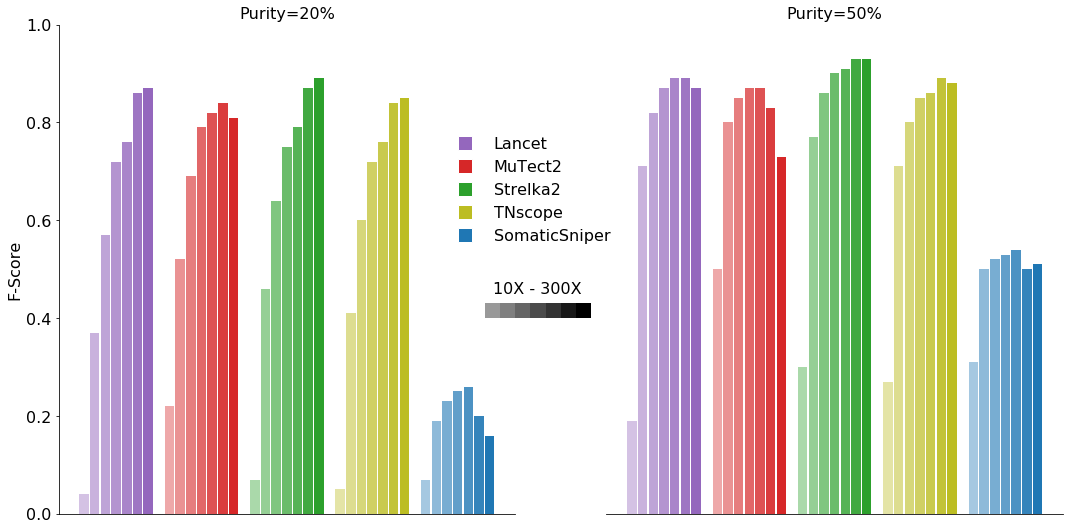

In [26]:
fig = plt.figure(figsize=(18, 9))

X = np.arange(pure20_10x.shape[1])

ax = fig.add_subplot(1, 2, 1)

ax.bar(X - 3/8, pure20_10x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.4, width = 1/9)
ax.bar(X - 2/8, pure20_30x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.5, width = 1/9)
ax.bar(X - 1/8, pure20_50x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.6, width = 1/9)
ax.bar(X      , pure20_80x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.7, width = 1/9)
ax.bar(X + 1/8, pure20_100x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.8, width = 1/9)
ax.bar(X + 2/8, pure20_200x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.9, width = 1/9)
ax.bar(X + 3/8, pure20_300x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=1.0, width = 1/9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = plt.xticks(())

ax.set_ylim((0, 1))
ax.set_ylabel('F-Score', size=16)
_ = plt.yticks(size=16)

ax.set_title('Purity=20%', size=16)



ax = fig.add_subplot(1, 2, 2)

ax.bar(X - 3/8, pure50_10x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.4, width = 1/9)
ax.bar(X - 2/8, pure50_30x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.5, width = 1/9)
ax.bar(X - 1/8, pure50_50x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.6, width = 1/9)
ax.bar(X      , pure50_80x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.7, width = 1/9)
ax.bar(X + 1/8, pure50_100x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.8, width = 1/9)
ax.bar(X + 2/8, pure50_200x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=0.9, width = 1/9)
ax.bar(X + 3/8, pure50_300x.to_numpy()[0], color = ('tab:purple', 'tab:red', 'tab:green', 'tab:olive', 'tab:blue'), alpha=1.0, width = 1/9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim((0, 1))
ax.set_title('Purity=50%', size=16)

legend_elements = [Line2D([0], [0], marker='s', color='w', label='Lancet', markerfacecolor='tab:purple', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='MuTect2', markerfacecolor='tab:red', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='Strelka2', markerfacecolor='tab:green', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='TNscope', markerfacecolor='tab:olive', markersize=14),
                   Line2D([0], [0], marker='s', color='w', label='SomaticSniper', markerfacecolor='tab:blue', markersize=14),

                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.04 ,0.8), frameon=False, fontsize=16)


ax.text(-2, 0.45, '10X - 300X', fontsize=16)

ax.add_patch(plt.Rectangle((-2.1,          0.4 ), 1.25/7, 0.03, color='black', alpha=0.4, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+1/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=0.5, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+2/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=0.6, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+3/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=0.7, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+4/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=0.8, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+5/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=0.9, clip_on=False, linewidth = 0))
ax.add_patch(plt.Rectangle((-2.1+6/7*1.25, 0.4 ), 1.25/7, 0.03, color='black', alpha=1.0, clip_on=False, linewidth = 0))

_ = plt.xticks(())

_ = plt.savefig('../Main_Figs/Fig_4d_3.pdf', bbox_inches='tight')